Import packages

In [ ]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Import datasets

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujaymann/handwritten-english-characters-and-digits")

print("Path to dataset files:", path)

100%|██████████| 205M/205M [00:00<00:00, 238MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sujaymann/handwritten-english-characters-and-digits/versions/6


In [ ]:
import os
print("Files in dataset folder:")
print(os.listdir(path))

Files in dataset folder:
['handwritten-english-characters-and-digits', 'image_labels.csv', 'augmented_images']


In [ ]:
train_dir = os.path.join(path, "handwritten-english-characters-and-digits/combined_folder/train") #'/kaggle/input/handwritten-english-characters-and-digits/handwritten-english-characters-and-digits/combined_folder/train'
test_dir  = os.path.join(path, "handwritten-english-characters-and-digits/combined_folder/test") #'/kaggle/input/handwritten-english-characters-and-digits/handwritten-english-characters-and-digits/combined_folder/test'
augmented_data= os.path.join(path, "augmented_images/augmented_images1") #'/kaggle/input/handwritten-english-characters-and-digits/augmented_images/augmented_images1'

Data preprocessing

In [ ]:
validate_ds=tf.keras.utils.image_dataset_from_directory(
    train_dir, # Root folder containing one subfolder per class
    image_size=(64,64),
    batch_size=32, # Number of samples per batch
    label_mode='categorical' # One-hot encoded labels (shape: [batch, num_classes])
)

Found 2728 files belonging to 62 classes.


In [ ]:
augmented_ds=tf.keras.utils.image_dataset_from_directory(
    augmented_data, # Root folder containing one subfolder per class
    image_size=(64,64),
    batch_size=32, # Number of samples per batch
    label_mode='categorical' # One-hot encoded labels (shape: [batch, num_classes])
)

Found 13640 files belonging to 62 classes.


In [ ]:
test_ds=tf.keras.utils.image_dataset_from_directory(
    test_dir, # Root folder containing one subfolder per class
    image_size=(64,64),
    batch_size=32, # Number of samples per batch
    label_mode='categorical' # One-hot encoded labels (shape: [batch, num_classes])
)

Found 682 files belonging to 62 classes.


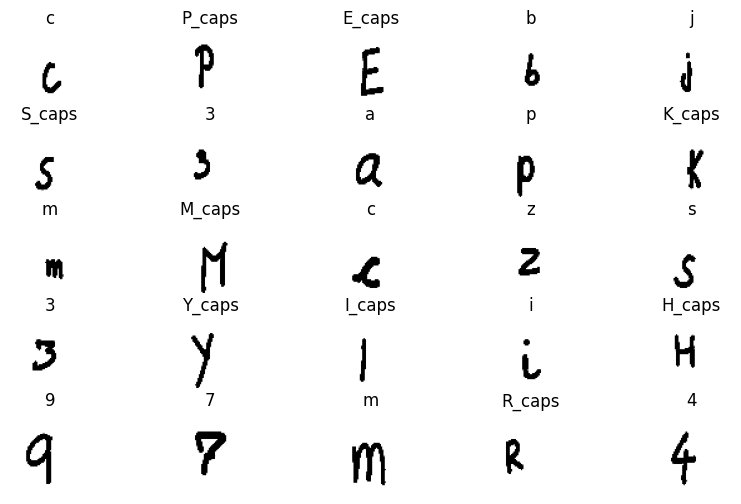

In [23]:
# Get the class names (list of folder names = labels)
class_names = validate_ds.class_names
# print(class_names)   # Uncomment to see the class labels

# Take 1 batch (32 images if batch_size=32) from the validation dataset
for images, labels in validate_ds.take(1):
    plt.figure(figsize=(10, 6))  # create a figure for plotting

    # Loop through the first 25 images in this batch
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)  # arrange in a 5x5 grid

        # Display the image (convert tensor → numpy → uint8 for plotting)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Get the label index (since labels are one-hot encoded categorical)
        label_index = tf.argmax(labels[i]).numpy()

        # Use the index to get the class name and display it as title
        plt.title(class_names[label_index])

        # Remove axis ticks for cleaner visualization
        plt.axis("off")


In [24]:
# Count the total number of images in each dataset by unbatching
# (unbatch() removes the batch dimension so we can iterate over single images)

train_count = sum(1 for _ in validate_ds.unbatch())   # count images in training set
val_count   = sum(1 for _ in augmented_ds.unbatch())  # count images in augmented dataset
test_count  = sum(1 for _ in test_ds.unbatch())       # count images in test dataset

# Print out dataset sizes
print(f"Training images: {train_count}")
print(f"Augmented images: {val_count}")
print(f"Test images: {test_count}")


Training images: 2728
Augmented images: 13640
Test images: 682


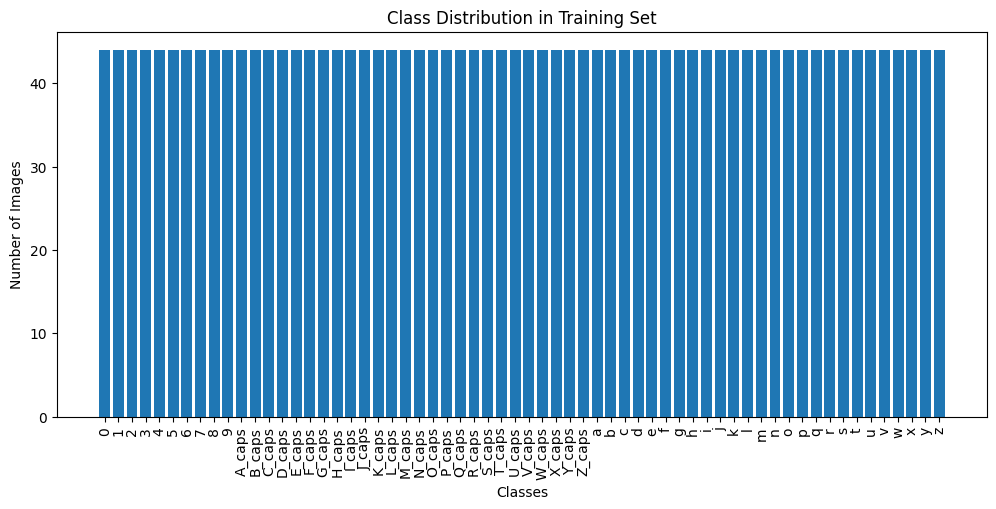

In [25]:
# Initialize a dictionary to store image counts for each class
counts = {name: 0 for name in class_names}

# Iterate over each image and its label in the unbatched validation dataset
for _, label in validate_ds.unbatch():
    # labels are one-hot encoded, so use argmax to get the class index
    class_index = np.argmax(label.numpy())
    # Increment the count for the corresponding class name
    counts[class_names[class_index]] += 1

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(12, 5))  # set figure size
plt.bar(counts.keys(), counts.values())  # plot class names vs counts
plt.xticks(rotation=90)  # rotate x-axis labels for readability
plt.title("Class Distribution in Training Set")  # title of the plot
plt.xlabel("Classes")  # x-axis label
plt.ylabel("Number of Images")  # y-axis label
plt.show()  # display the plot


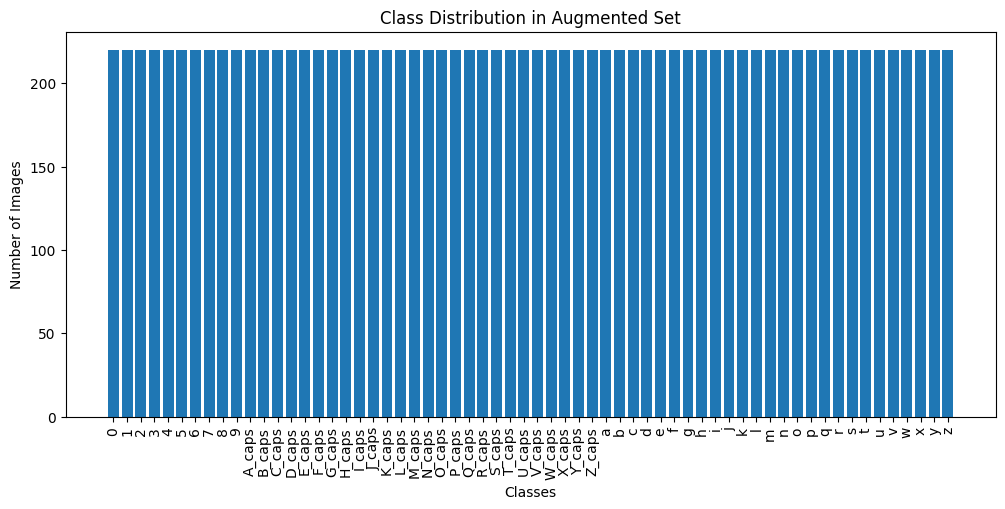

In [26]:
# Initialize a dictionary to store image counts for each class in the augmented dataset
counts = {name: 0 for name in class_names}

# Iterate over each image and its label in the unbatched augmented dataset
for _, label in augmented_ds.unbatch():
    # labels are one-hot encoded, so use argmax to get the class index
    class_index = np.argmax(label.numpy())
    # Increment the count for the corresponding class name
    counts[class_names[class_index]] += 1

# Create a bar plot to visualize the class distribution in the augmented dataset
plt.figure(figsize=(12, 5))  # set figure size
plt.bar(counts.keys(), counts.values())  # plot class names vs counts
plt.xticks(rotation=90)  # rotate x-axis labels for readability
plt.title("Class Distribution in Augmented Set")  # title of the plot
plt.xlabel("Classes")  # x-axis label
plt.ylabel("Number of Images")  # y-axis label
plt.show()  # display the plot


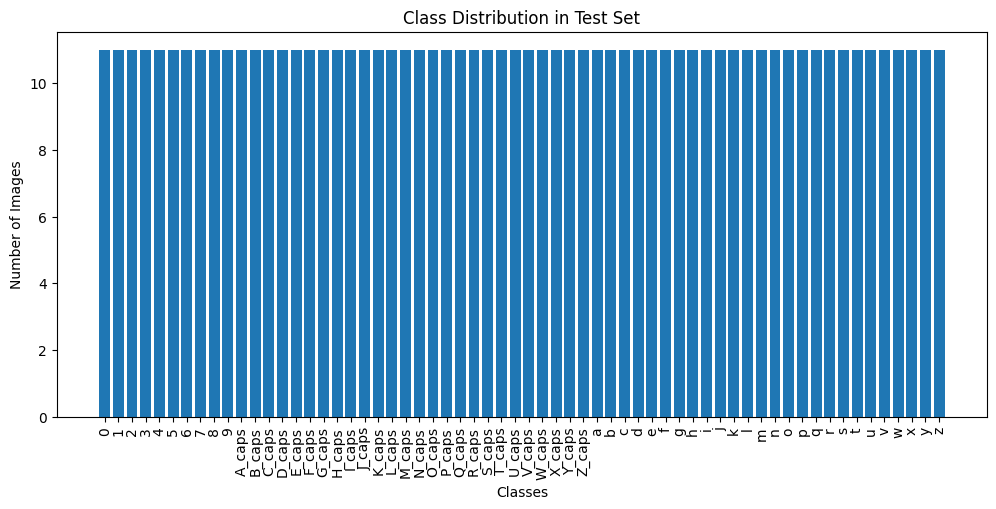

In [27]:
# Initialize a dictionary to store image counts for each class in the test dataset
counts = {name: 0 for name in class_names}

# Iterate over each image and its label in the unbatched test dataset
for _, label in test_ds.unbatch():
    # labels are one-hot encoded, so use argmax to get the class index
    class_index = np.argmax(label.numpy())
    # Increment the count for the corresponding class name
    counts[class_names[class_index]] += 1

# Create a bar plot to visualize the class distribution in the test dataset
plt.figure(figsize=(12, 5))  # set figure size
plt.bar(counts.keys(), counts.values())  # plot class names vs counts
plt.xticks(rotation=90)  # rotate x-axis labels for readability
plt.title("Class Distribution in Test Set")  # title of the plot
plt.xlabel("Classes")  # x-axis label
plt.ylabel("Number of Images")  # y-axis label
plt.show()  # display the plot


Training set pixel stats:
mean: 0.9419
std: 0.2332
min: 0.0000
max: 1.0000
brightness_mean: 0.9419
brightness_std: 0.0200


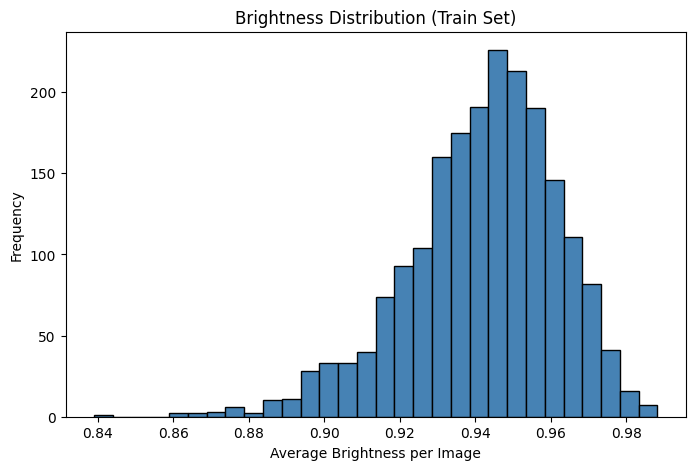

In [ ]:
# --- Descriptive statistics of pixel values ---

def compute_stats(dataset, sample_size=2000):
    """Compute mean, std, min, max, brightness for a subset of images."""
    pixel_values = []
    brightness = []

    for images, _ in dataset.unbatch().take(sample_size):
        img = images.numpy().astype("float32") / 255.0  # normalize [0,1]
        pixel_values.append(img.flatten())
        brightness.append(np.mean(img))  # average intensity per image

    pixel_values = np.concatenate(pixel_values)

    stats = {
        "mean": np.mean(pixel_values),
        "std": np.std(pixel_values),
        "min": np.min(pixel_values),
        "max": np.max(pixel_values),
        "brightness_mean": np.mean(brightness),
        "brightness_std": np.std(brightness),
    }
    return stats, brightness

# Compute stats on train set
train_stats, train_brightness = compute_stats(validate_ds)
print("Training set pixel stats:")
for k, v in train_stats.items():
    print(f"{k}: {v:.4f}")

# Brightness distribution visualization
plt.figure(figsize=(8,5))
plt.hist(train_brightness, bins=30, color="steelblue", edgecolor="black")
plt.title("Brightness Distribution (Train Set)")
plt.xlabel("Average Brightness per Image")
plt.ylabel("Frequency")
plt.show()


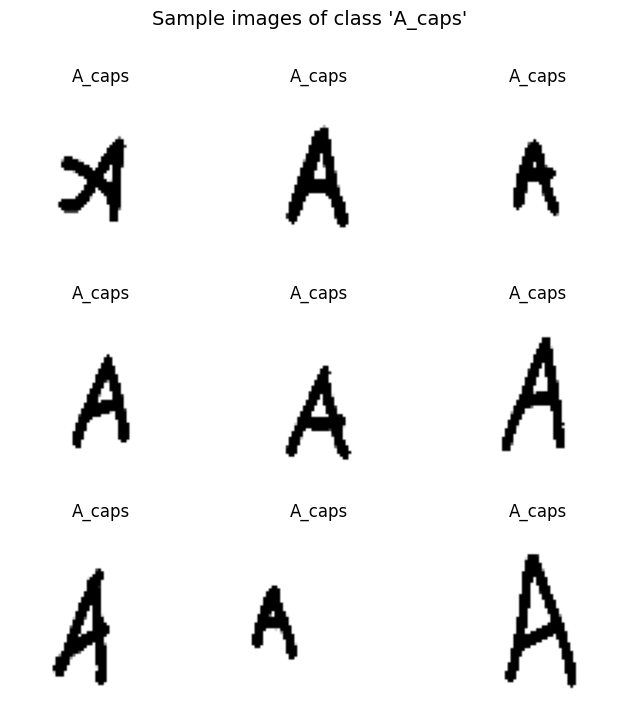

In [22]:
# Pick the class you want to visualize
target_class = "A_caps"   # change to any class in validate_ds.class_names
target_index = validate_ds.class_names.index(target_class)

# Collect images of that class
images_of_class = []
for images, labels in validate_ds.unbatch():
    if np.argmax(labels.numpy()) == target_index:
        images_of_class.append(images.numpy().astype("uint8"))
    if len(images_of_class) >= 9:  # show first 9 images
        break

# Plot them
plt.figure(figsize=(8, 8))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images_of_class[i])
    plt.title(target_class)
    plt.axis("off")
plt.suptitle(f"Sample images of class '{target_class}'", fontsize=14)
plt.show()